<a href="https://colab.research.google.com/github/Draksahil/Crop-Yield-Prediction/blob/main/ML_Based_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# ML Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For warnings
import warnings
warnings.filterwarnings('ignore')



In [21]:
# Load dataset from CSV file
data = pd.read_csv("/content/Crop_recommendation (1).csv")

# Quick overview
print("First 5 records:")
print(data.head())

print("\nData Information:")
print(data.info())

print("\nCheck missing values:")
print(data.isnull().sum())


First 5 records:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
me

In [22]:
# Encoding the categorical target (label)
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])

# Separate features and target
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [23]:
# 70% training, 30% testing split, reproducible with random_state
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1540, 7)
Test shape: (660, 7)


In [24]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n--- Linear Regression Evaluation ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 score:", r2_score(y_test, y_pred_lr))



--- Linear Regression Evaluation ---
MSE: 29.18616453106132
R2 score: 0.27821243497931314


In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))



--- Decision Tree Evaluation ---
Accuracy: 0.9863636363636363
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.94      0.90        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00      

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))



--- Random Forest Evaluation ---
Accuracy: 0.990909090909091
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00       

In [27]:
# Install xgboost if needed: !pip install xgboost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n--- XGBoost Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))



--- XGBoost Evaluation ---
Accuracy: 0.9818181818181818
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      0.95      0.98        22
       maize       1.00      0.96      0.98        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.97      1.00      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
 

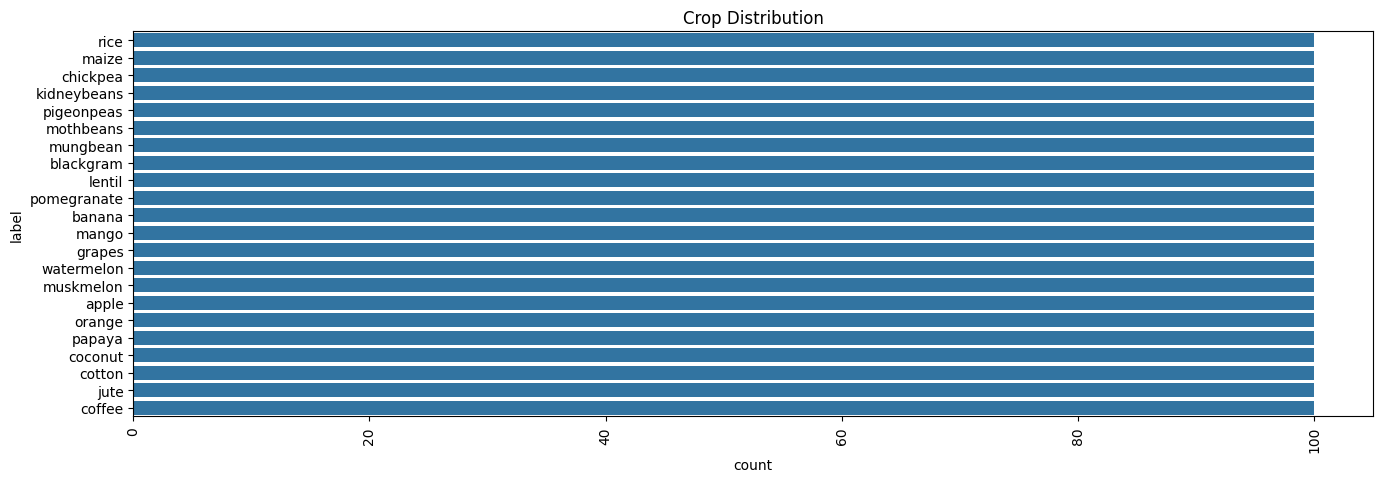

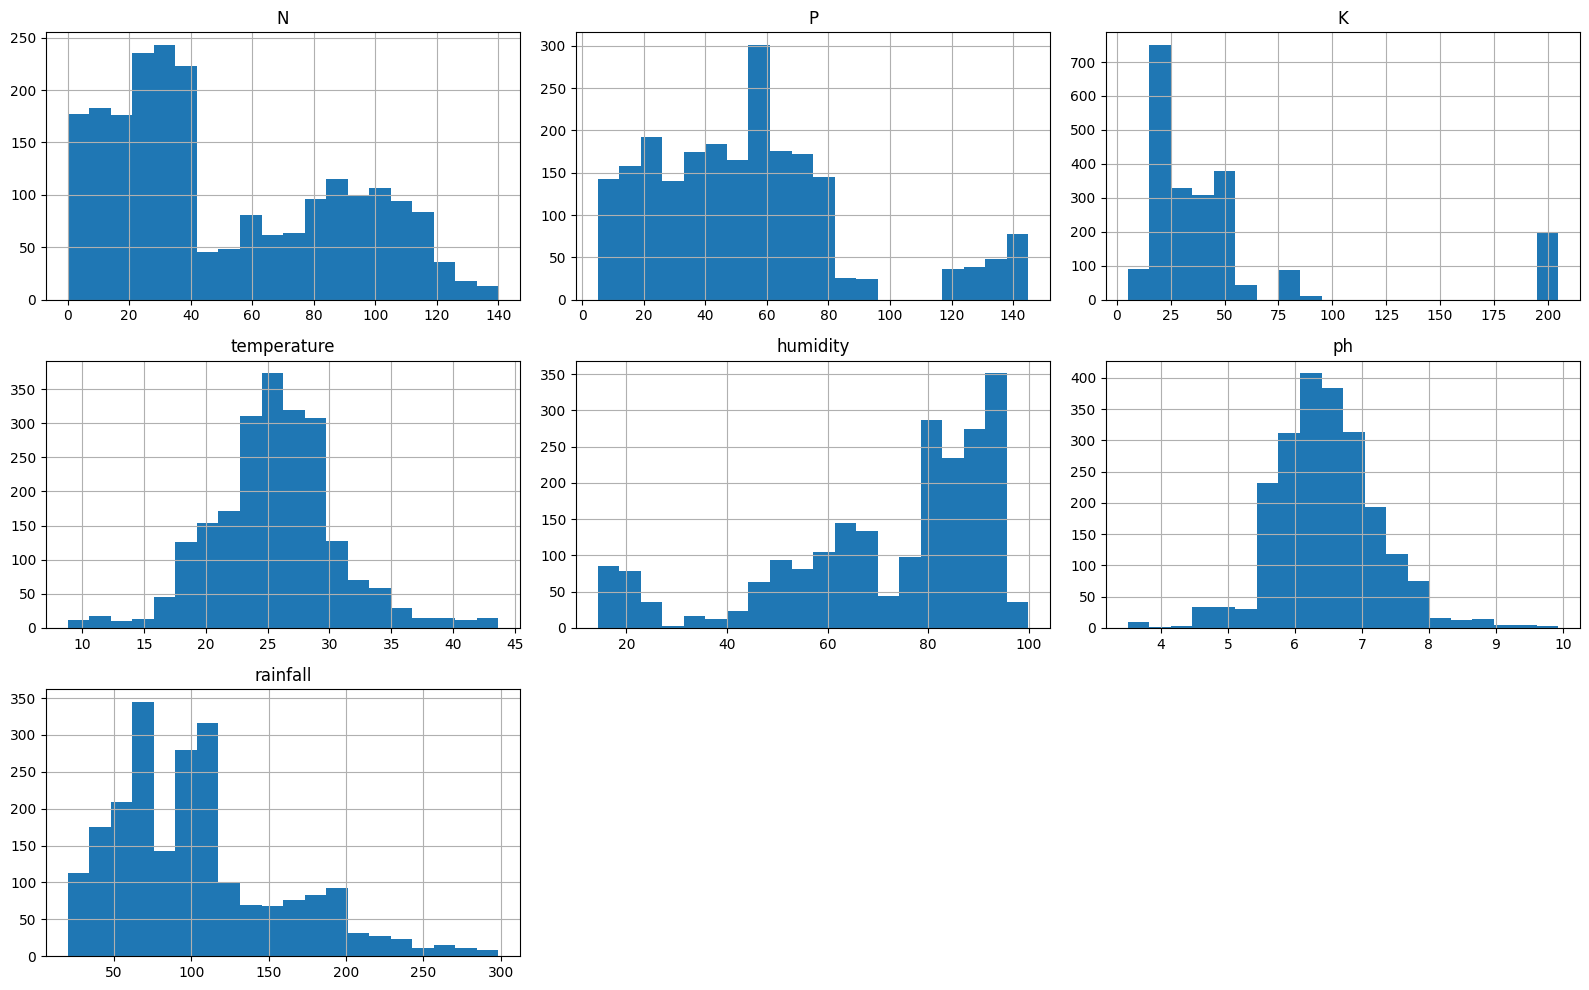

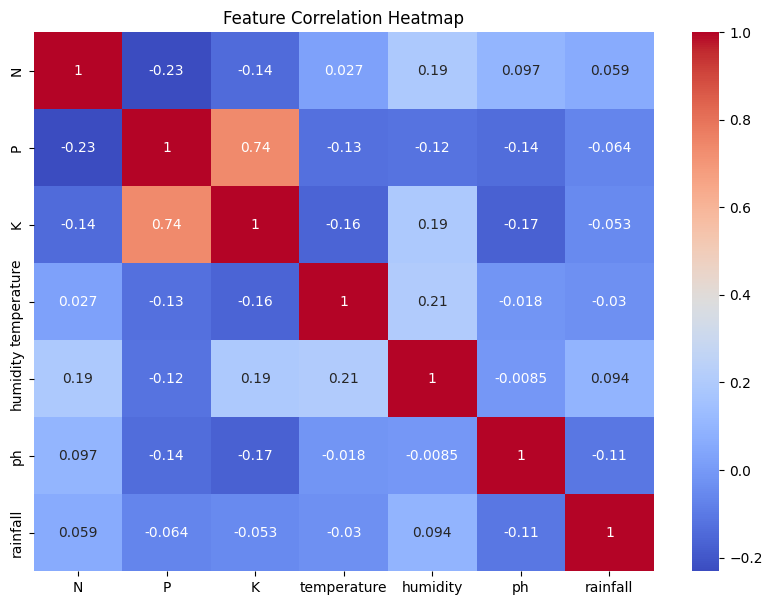

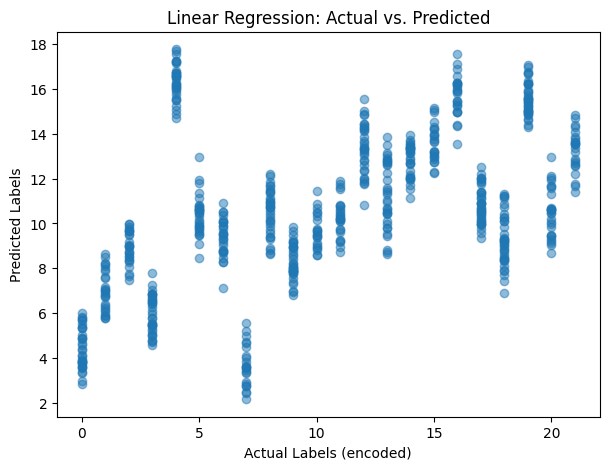

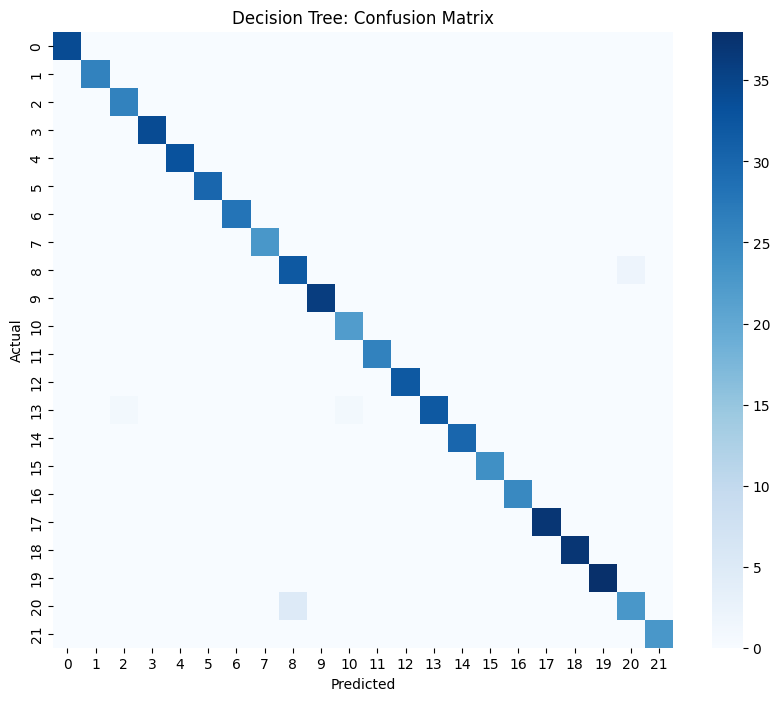

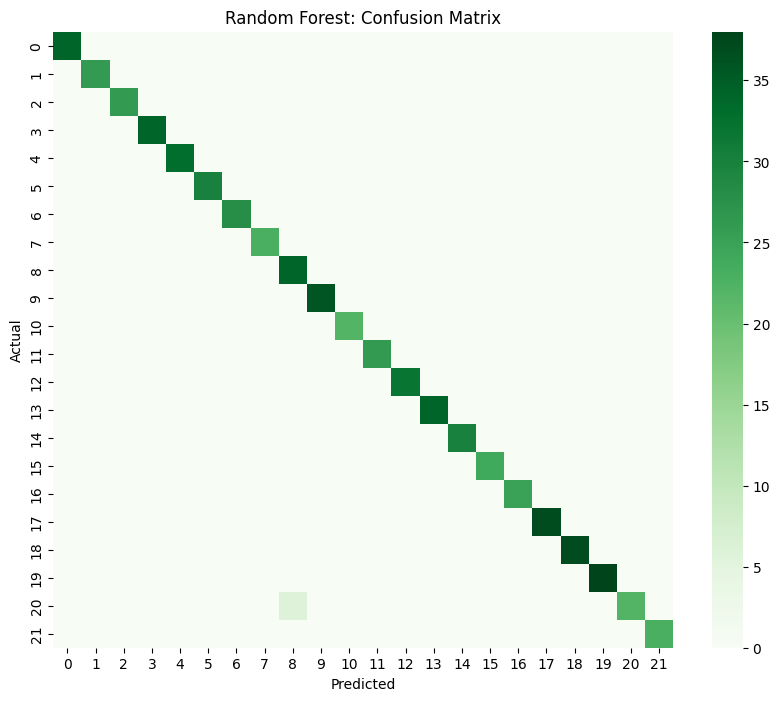

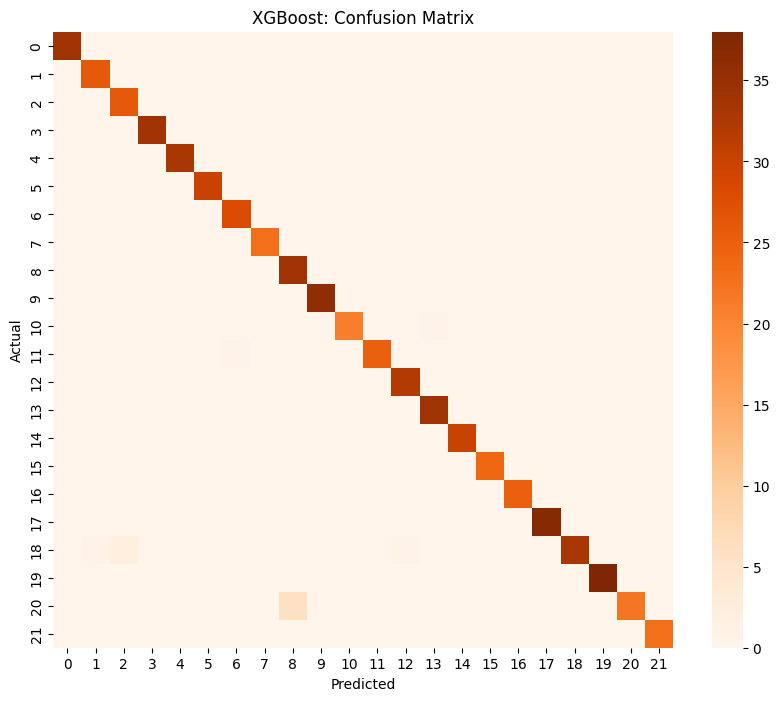

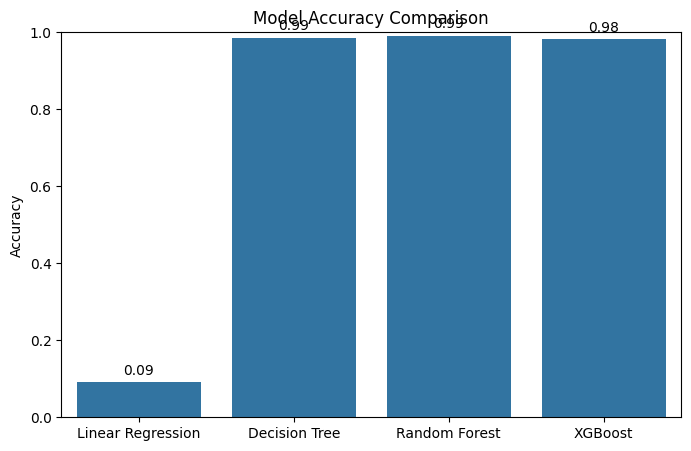

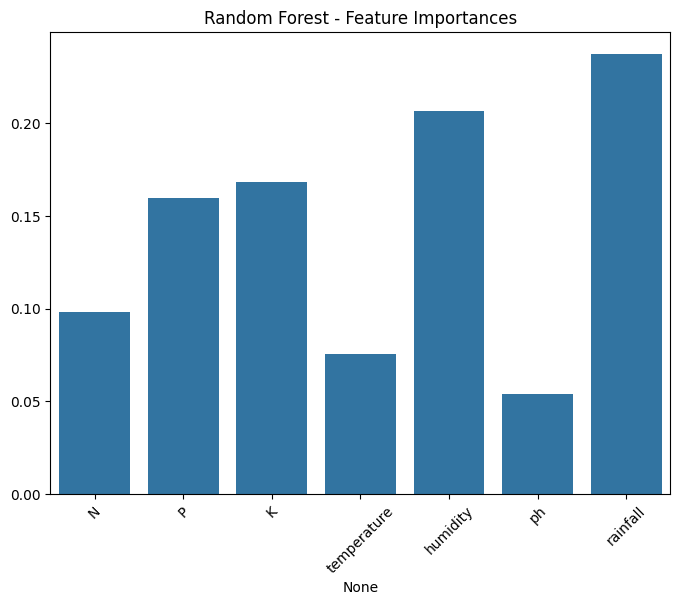

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Crop Distribution
plt.figure(figsize=(16, 5))
sns.countplot(data['label'], order=data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crop Distribution')
plt.show()

# 2. Feature Distributions
features = data.columns[:-2]  # adjust as needed if label_encoded exists
data[features].hist(figsize=(16, 10), bins=20)
plt.tight_layout()
plt.show()

# 3. Feature Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 4. Linear Regression: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Labels (encoded)')
plt.ylabel('Predicted Labels')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

# 5. Decision Tree: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues')
plt.title('Decision Tree: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Random Forest: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, cmap='Greens')
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. XGBoost: Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,8))
sns.heatmap(cm_xgb, cmap='Oranges')
plt.title('XGBoost: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 8. Model Accuracy Comparison
import numpy as np
accuracies = [
    accuracy_score(y_test, np.rint(y_pred_lr)), # approximate for regression
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.02, f"{acc:.2f}", ha='center')
plt.show()

# 9. Random Forest Feature Importances
feat_importances = rf.feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=X.columns, y=feat_importances)
plt.xticks(rotation=45)
plt.title('Random Forest - Feature Importances')
plt.show()
